/home/shaji/opencv/local/lib/python2.7/site-packages/sklearn/model_selection/_split.py:2069: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Training set has 156 samples.
Testing set has 40 samples.
[1 1 1 1 0 0 1 1 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 1 1 1 0 0 1 1 1 1 0 0 1 0
 0 1 0]
[[15  4]
 [ 1 20]]
              precision    recall  f1-score   support

           0       0.94      0.79      0.86        19
           1       0.83      0.95      0.89        21

   micro avg       0.88      0.88      0.88        40
   macro avg       0.89      0.87      0.87        40
weighted avg       0.88      0.88      0.87        40

('Accuracy is', 0.875)


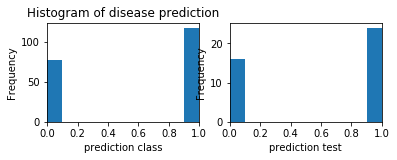

In [4]:
#training the model with above generated csv file

import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import test061_training00

data=pd.read_csv("dr_features_output_main.csv")
data_new=pd.read_csv("dr_features_output_main.csv")

predictions=data_new['count']
#data_new

threshold = 30
#data_new['pred_value'] = predictions.apply(lambda x: 1 if x > threshold else 0)
#data_new['pred_value00'] = data_new['pred_value']


features_raw = data_new[[ "count", "area"]]
predict_class = data_new['pred_values']


from sklearn.model_selection import train_test_split


np.random.seed(100)

X_train, X_test, y_train, y_test = train_test_split(features_raw, predict_class, train_size=0.80, random_state=1)
#train_size is set to .10 not .80 for less accuracy measure

# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])


import sklearn
from sklearn import svm

C = 5
# Create SVM classification object 
#svc = svm.SVC(kernel='linear',C=C,gamma=2)
svc = svm.SVC(kernel='linear',C=C,gamma=2)

svc.fit(X_train, y_train)


from sklearn.metrics import fbeta_score
predictions_test = svc.predict(X_test)
print(predictions_test)


from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predictions_test))
print(classification_report(y_test, predictions_test))


plt.subplot(221), plt.hist(predict_class, bins=10)
plt.xlim(0,1)
plt.title('Histogram of disease prediction')
plt.xlabel('prediction class')
plt.ylabel('Frequency')

plt.subplot(222), plt.hist(predictions_test, bins=10)
plt.xlim(0,1)
plt.xlabel('prediction test')
plt.ylabel('Frequency')

print('Accuracy is',metrics.accuracy_score(y_test,predictions_test))

